In [110]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




In [50]:
train_data = pd.DataFrame(pd.read_excel('Data_Train.xlsx'))
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [66]:
test_data = pd.DataFrame(pd.read_excel('Test_set.xlsx'))
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [68]:
combine_dataframe = [train_data, test_data]
df = pd.concat(combine_dataframe)

In [69]:
# shape of the df

df.shape

(13354, 11)

In [70]:
# size of df
df.size

146894

In [71]:
# information of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [72]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [80]:
# split date of journey into day, date and year column
df[['Day', 'Month', 'Year']] = df['Date_of_Journey'].str.split('/', expand=True)
print(df)

                Airline Date_of_Journey    Source Destination  \
0                IndiGo      24/03/2019  Banglore   New Delhi   
1             Air India       1/05/2019   Kolkata    Banglore   
2           Jet Airways       9/06/2019     Delhi      Cochin   
3                IndiGo      12/05/2019   Kolkata    Banglore   
4                IndiGo      01/03/2019  Banglore   New Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                 BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1     CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 sto

In [81]:
df[['Day', 'Month', 'Year']] = df[['Day', 'Month', 'Year']].astype(int)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [84]:
# Since we have day, month and year in seperate column, we don't need date_of_journey column

df.drop(columns='Date_of_Journey', axis=1, inplace=True)

(array([4.054e+03, 3.780e+03, 2.585e+03, 1.650e+02, 6.300e+01, 2.000e+01,
        7.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759.        ,  6942.53333333, 12126.06666667, 17309.6       ,
        22493.13333333, 27676.66666667, 32860.2       , 38043.73333333,
        43227.26666667, 48410.8       , 53594.33333333, 58777.86666667,
        63961.4       , 69144.93333333, 74328.46666667, 79512.        ]),
 <BarContainer object of 15 artists>)

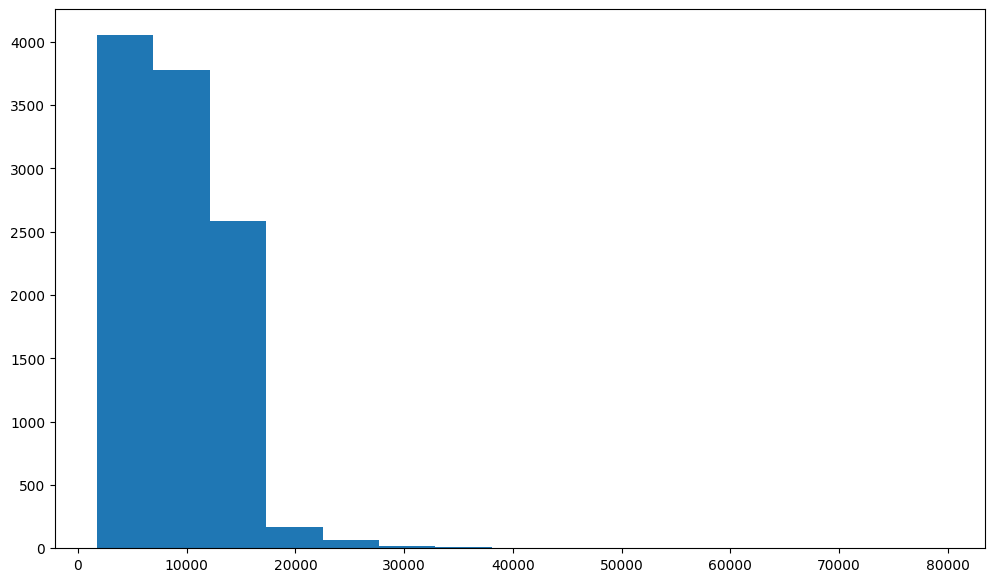

In [90]:
plt.figure(figsize=[12,7])
plt.hist(df['Price'], bins=15)


In [102]:
x = df.drop(columns='Price')
y = df['Price'].fillna(0)

In [103]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [104]:
x_test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
1783,Jet Airways,Mumbai,Hyderabad,BOM → HYD,07:05,08:30,1h 25m,non-stop,In-flight meal not included,9,6,2019
7591,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,14:05,09:00 07 Mar,18h 55m,1 stop,No info,6,3,2019
188,Air Asia,Delhi,Cochin,DEL → BLR → COK,07:55,15:45,7h 50m,1 stop,No info,21,4,2019
1978,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,09:35,23:35,14h,1 stop,No info,24,5,2019
1085,Air India,Delhi,Cochin,DEL → BLR → COK,20:30,23:00 22 Apr,26h 30m,1 stop,No info,21,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
621,Air India,Banglore,New Delhi,BLR → HYD → DEL,08:15,21:25,13h 10m,1 stop,No info,15,3,2019
2094,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,10:00,21:00,11h,1 stop,No info,27,5,2019
1532,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,09:15,19:00,9h 45m,1 stop,No info,15,5,2019
2380,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,06:40,19:15,12h 35m,1 stop,No info,6,6,2019


In [105]:
x_train_simple = X_train['Year'].values.reshape(-1,1)
x_test_simpole = x_test['Year'].values.reshape(-1,1)
Y_train

2340      2385.0
265       7695.0
4023     13344.0
10398     6541.0
7406      7870.0
          ...   
1281         0.0
5191     10844.0
5390      7670.0
860       6144.0
7270     10262.0
Name: Price, Length: 10683, dtype: float64

In [106]:
simple_lr = LinearRegression()
simple_lr.fit(x_train_simple, Y_train)

LinearRegression()

In [109]:
y_hat = simple_lr.predict(x_test_simpole)
y_hat[:5]

array([7264.49274548, 7264.49274548, 7264.49274548, 7264.49274548,
       7264.49274548])

In [113]:
# # plot
# plt.figure(figsize=(12.6))
# sns.regplot(x = 'Year', y = 'Price', data= df)
# plt.show()